<a href="https://colab.research.google.com/github/ErikCikalleshi/diffusion_model_VQGAN/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Kautenja/a-neural-algorithm-of-artistic-style.git

Cloning into 'a-neural-algorithm-of-artistic-style'...
remote: Enumerating objects: 2057, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 2057 (delta 16), reused 25 (delta 5), pack-reused 2009
Receiving objects: 100% (2057/2057), 703.30 MiB | 25.78 MiB/s, done.
Resolving deltas: 100% (1039/1039), done.


In [2]:
!ls

a-neural-algorithm-of-artistic-style  sample_data


In [3]:
%cd a-neural-algorithm-of-artistic-style

/content/a-neural-algorithm-of-artistic-style


# Content Layer

In [4]:
import numpy as np
np.random.seed(222)
import tensorflow as tf
tf.random.set_seed(222)
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.io as io
import skimage.transform as T

In [6]:
from src.transfer_style import Stylizer
from src.optimizers import GradientDescent, Adam, L_BFGS
from src.callback import Callback

In [7]:
ITERATIONS = 30

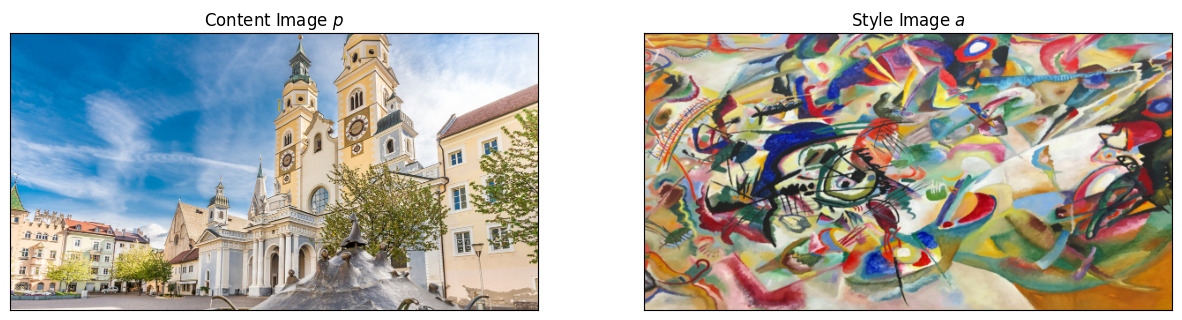

In [11]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
content = io.imread('img/content/brixen.jpg')
content = T.rescale(content, (0.5, 0.5, 1), preserve_range=True).astype('uint8')
ax = plt.imshow(content)
plt.title('Content Image $p$')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())
plt.subplot(1, 2, 2)
style = io.imread('img/styles/composition-vii.jpg')
style = T.resize(style, content.shape[:-1], preserve_range=True).astype('uint8')
ax = plt.imshow(style)
plt.title('Style Image $a$')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

In [12]:
def stylize(iterations: int, content_layer_name: str, ):
    """
    Stylize the image.

    Args:
        iterations: the number of iterations to optimize
        content_layer_name: the name of the content layer to use

    Returns:
        a stylized image

    """
    sty = Stylizer(
        content_weight=1,
        style_weight=1e4,
        content_layer_name=content_layer_name,
        style_layer_names=['block1_conv1', 'block2_conv1', 'block3_conv1']
    )
    img = sty(
        content=content,
        style=style,
        optimize=L_BFGS(max_evaluations=20),
        iterations=iterations,
        callback=Callback('build/content-layer/{}'.format(content_layer_name))
    )
    io.imsave('img/content-layer/{}.jpg'.format(content_layer_name), img)

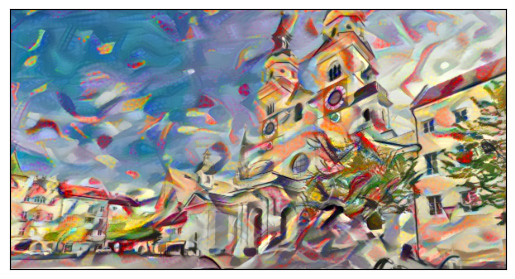

100%|██████████| 30/30 [02:14<00:00,  4.48s/it]


In [18]:
stylize(ITERATIONS, 'block1_conv1')

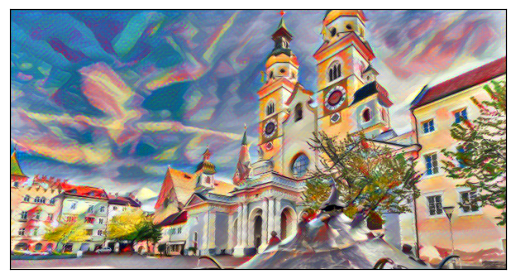

100%|██████████| 30/30 [02:14<00:00,  4.48s/it]


In [14]:
stylize(ITERATIONS, 'block2_conv1')

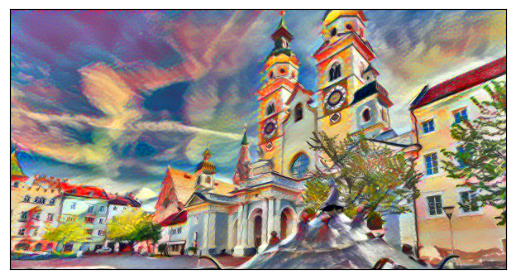

100%|██████████| 30/30 [02:11<00:00,  4.37s/it]


In [15]:
stylize(ITERATIONS, 'block3_conv1')

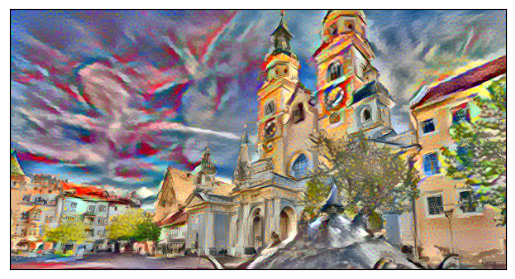

100%|██████████| 30/30 [02:43<00:00,  5.46s/it]


In [16]:
stylize(ITERATIONS, 'block4_conv1')

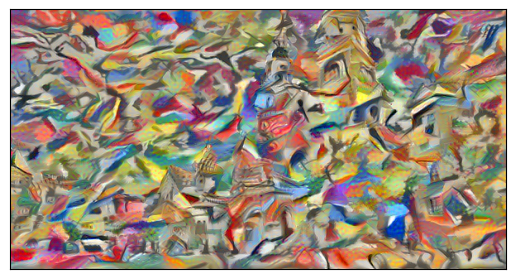

100%|██████████| 30/30 [03:11<00:00,  6.38s/it]


In [17]:
stylize(ITERATIONS, 'block5_conv1')